In [1]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm

from collections import defaultdict, Counter
from itertools import combinations

In [2]:
def read_snap(edge_file, com_file, prefix=""):
    edges = pd.read_csv(prefix+edge_file, sep='\t', comment="#")
    coms = []
    with open(prefix+com_file, "r") as infile:
        for line in infile:
            x = line[:-1]  # drop trailing newline
            x = x.split('\t')
            coms.append(frozenset([int(y) for y in x])) ## map to 0-based

    g = ig.Graph.DataFrame(edges, directed=False)

    c = [set() for _ in range(g.vcount())]
    for i, com in enumerate(coms):
        for v in com:
            c[v].add(i)
    c = [frozenset(i) for i in c] 
    g.vs["comms"] = c

    # Vertex list is not continugous, drop degree 0 vertices
    g = g.subgraph(np.arange(g.vcount())[np.array(g.degree()) > 0])  

    # Drop some vars to free up memory
    del edges

    return g, list(g.vs["comms"])


def read_abcdoo_coms(com_file, prefix=""):
    ## read communities
    file = prefix+com_file
    c = []
    with open(file, "r") as infile:
        for line in infile:
            x = line.split('\t')
            c.append([int(y)-1 for y in x[1].rstrip()[1:-1].split(',')]) ## map to 0-based

    return c

In [3]:
## DBLP graph
dblp_g, dblp_coms = read_snap("com-dblp.ungraph.txt", "com-dblp.all.cmty.txt", "../../SNAP/")
abcdoo_d2_coms = read_abcdoo_coms("abcdoo_dblp_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_coms = read_abcdoo_coms("abcdoo_dblp_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_coms = read_abcdoo_coms("abcdoo_dblp_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")

print(f"DBLP has {dblp_g.vcount()} vertices.")
print(f"DBLP has {dblp_g.ecount()} edges.")
print(f"DBLP has {len(dblp_coms)} communities.")
print(f"ABCDOO d2 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d5 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d10 has {len(abcdoo_d2_coms)} communities.")

DBLP has 317080 vertices.
DBLP has 1049865 edges.
DBLP has 317080 communities.
ABCDOO d2 has 317080 communities.
ABCDOO d5 has 317080 communities.
ABCDOO d10 has 317080 communities.


100%|██████████| 317080/317080 [01:31<00:00, 3455.64it/s]  


Skipped 165 nodes.


100%|██████████| 317080/317080 [00:01<00:00, 255594.63it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:00<00:00, 410983.01it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:04<00:00, 74642.05it/s]


Skipped 0 nodes.


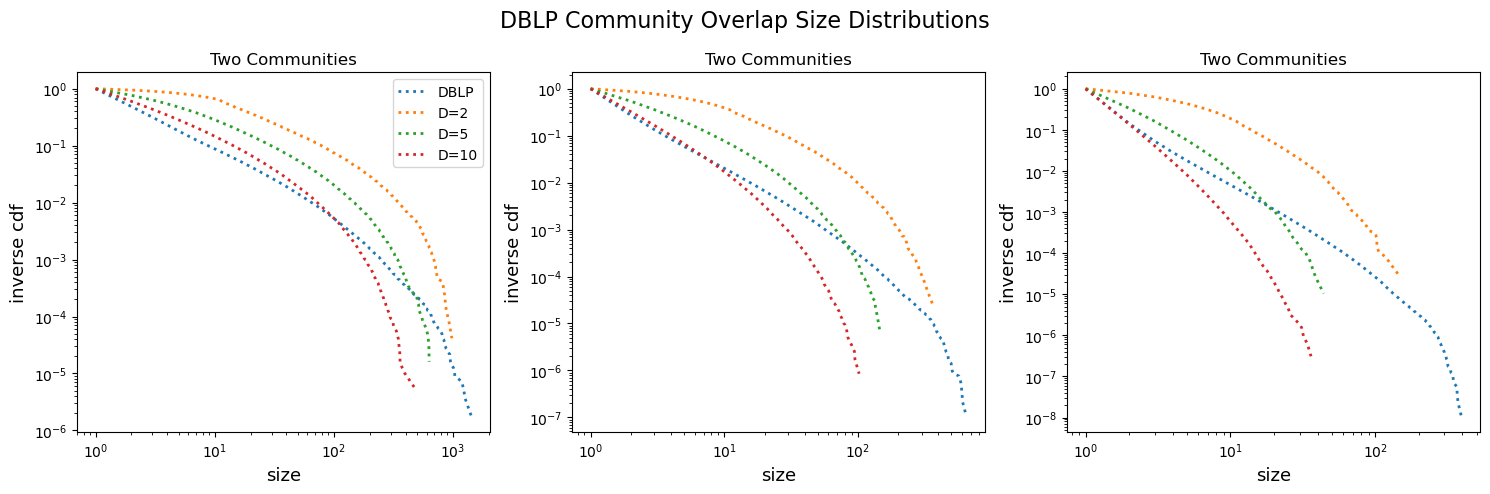

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

options = [dblp_coms, abcdoo_d2_coms, abcdoo_d5_coms, abcdoo_d10_coms]
names = ["DBLP", "D=2", "D=5", "D=10"]
for coms, name in zip(options, names):

    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 50:
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
        X.plot_ccdf(ax=axs[i], linewidth=2, original_data=False, linestyle=":", label=name)
        #print(name)
        #print("\ngamma:", X.power_law.alpha)
        #print("l':", X.power_law.xmin)
        #print("KS statistic:", X.power_law.D)

        
        axs[i].set_xlabel("size", fontsize=13)
        axs[i].set_ylabel("inverse cdf", fontsize=13)

axs[0].legend()
axs[0].set_title("Two Communities")
axs[1].set_title("Two Communities") 
axs[2].set_title("Two Communities") 
plt.suptitle("DBLP Community Overlap Size Distributions", fontsize=16)
plt.tight_layout()

Amazon has 334863 vertices.
Amazon has 925871 edges.
Amazon has 334863 communities.
ABCDOO d2 has 334863 communities.
ABCDOO d5 has 334863 communities.
ABCDOO d10 has 334863 communities.


100%|██████████| 334863/334863 [02:59<00:00, 1862.39it/s]


Skipped 76 nodes.


100%|██████████| 334863/334863 [00:33<00:00, 9986.77it/s] 


Skipped 0 nodes.


100%|██████████| 334863/334863 [00:31<00:00, 10493.28it/s]


Skipped 0 nodes.


100%|██████████| 334863/334863 [03:57<00:00, 1411.34it/s]


Skipped 0 nodes.


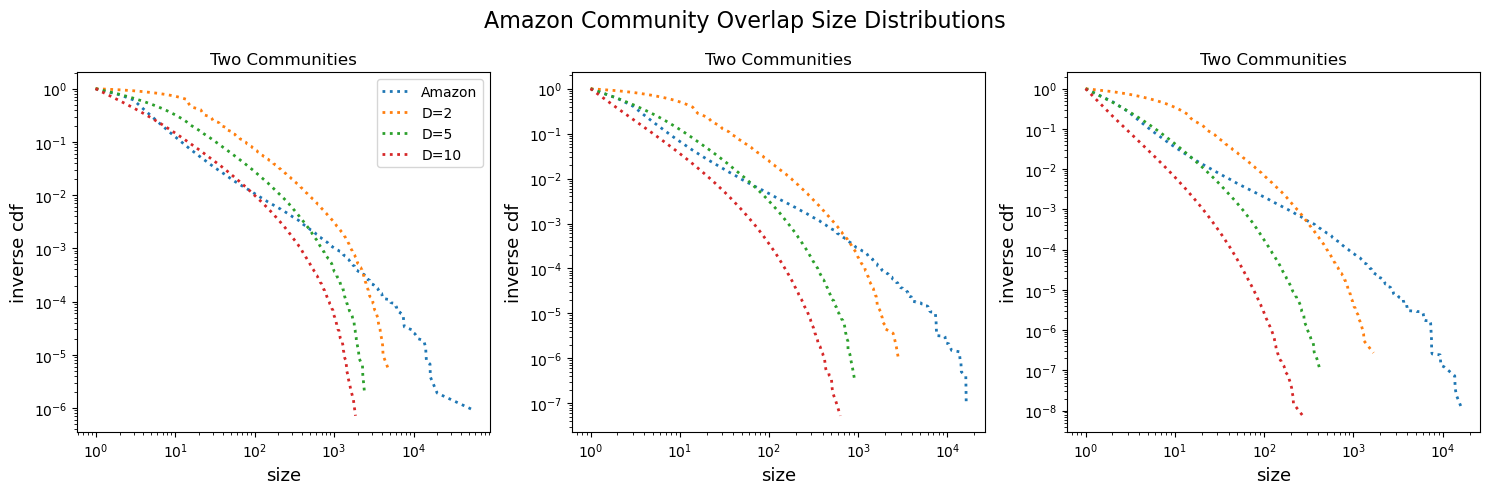

In [3]:
## Amazon graph
amazon_g, amazon_coms = read_snap("com-amazon.ungraph.txt", "com-amazon.all.dedup.cmty.txt", "../../SNAP/")
abcdoo_d2_coms = read_abcdoo_coms("abcdoo_amazon_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_coms = read_abcdoo_coms("abcdoo_amazon_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_coms = read_abcdoo_coms("abcdoo_amazon_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")

print(f"Amazon has {amazon_g.vcount()} vertices.")
print(f"Amazon has {amazon_g.ecount()} edges.")
print(f"Amazon has {len(amazon_coms)} communities.")
print(f"ABCDOO d2 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d5 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d10 has {len(abcdoo_d2_coms)} communities.")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [amazon_coms, abcdoo_d2_coms, abcdoo_d5_coms, abcdoo_d10_coms]
names = ["Amazon", "D=2", "D=5", "D=10"]
for coms, name in zip(options, names):

    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 50:
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
        X.plot_ccdf(ax=axs[i], linewidth=2, original_data=False, linestyle=":", label=name)
        #print(name)
        #print("\ngamma:", X.power_law.alpha)
        #print("l':", X.power_law.xmin)
        #print("KS statistic:", X.power_law.D)

        
        axs[i].set_xlabel("size", fontsize=13)
        axs[i].set_ylabel("inverse cdf", fontsize=13)

axs[0].legend()
axs[0].set_title("Two Communities")
axs[1].set_title("Two Communities") 
axs[2].set_title("Two Communities") 
plt.suptitle("Amazon Community Overlap Size Distributions", fontsize=16)
plt.tight_layout()